## Red Neuronal MultiCapa, OOP model

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Solo en caso de tener Jupyter Themes
from jupyterthemes import jtplot
jtplot.reset()

### Importar Images

In [5]:
from get_images import get_images

In [6]:
# MNIST path
mnist_path = './mnist_raw/'
x_train_num, y_train_num, x_test_num, y_test_num = get_images(mnist_path)

x_train = x_train_num[:50000].reshape(50000, -1).astype(float)
y_train = y_train_num[:50000].reshape(50000, 1)

x_val = x_train_num[50000:].reshape(10000, -1).astype(float)
y_val = y_train_num[50000:].reshape(10000, 1)

x_test = x_test_num.copy().reshape(10000, -1).astype(float)
y_test = y_test_num.copy().reshape(10000, 1)

In [7]:
def normalise(x_mean, x_std, x_data):
    return (x_data-x_mean)/x_std

In [8]:
# x_t = x_train[:128]
x_t = normalise(x_train[:128].mean(),x_train[:128].std(), x_train[:128])
x_t.min(), x_t.max(), x_t.mean(), x_t.std()

(np.float64(-0.41872879109571276),
 np.float64(2.866634378902949),
 np.float64(-1.2305915923459962e-16),
 np.float64(1.0))

### Graficar muestras

In [9]:
def plot_number(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

La imagen muestreada representa un: 4


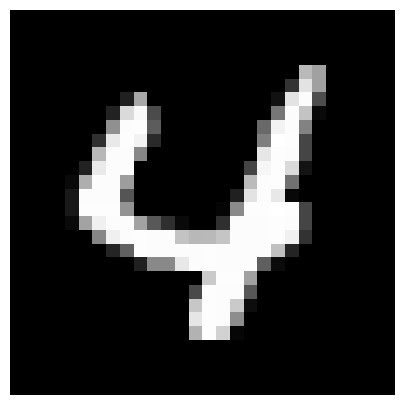

In [10]:
rnd_idx = np.random.randint(len(y_test))
print(f'La imagen muestreada representa un: {y_test[rnd_idx][0]}')
plot_number(x_test_num[rnd_idx])

### Inicialización de pesos sinápticos con Valores aleatorios, Xavier, y Kaiming He

#### Normal random

In [11]:
def init_params(neurons):
    weights = {}
    for i in range(len(neurons)-1):
        weights['L' + str(i+1)] = np.random.randn(neurons[i+1], neurons[i]) * 0.001
    
    return weights

#### Xavier

In [12]:
def init_xavier(neurons):
    weights = {}
    for i in range(len(neurons)-1):
        weights['L' + str(i+1)] = np.random.randn(neurons[i+1], neurons[i]) / np.sqrt(neurons[i])
    
    return weights

#### Kaiming He

In [13]:
def init_kaiming(neurons):
    weights = {}
    for i in range(len(neurons)-1):
        weights['L' + str(i+1)] = np.random.randn(neurons[i+1], neurons[i]) / np.sqrt(neurons[i]/2)  
    return weights

#### Definir algunas capas

In [14]:
neurons = [500] * 10
neurons[0] = 784
neurons[-1] = 10

print(neurons)

[784, 500, 500, 500, 500, 500, 500, 500, 500, 10]


#### Inicializar parámetros

In [15]:
weights = init_params(neurons)

In [16]:
weights_x = init_xavier(neurons)

In [17]:
weights_k = init_kaiming(neurons)

In [18]:
weights_k.keys()

dict_keys(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9'])

### Pruebas con Random init

In [19]:
acts = {}
z = x_t.T
for (k, v) in weights.items():
    z = v @ z
#     z = np.maximum(0, z)
    acts[k] = z

print(acts.keys())

dict_keys(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9'])


La activación para la capa L1 tiene una media de 0.0004246 y una std de 0.02798
La activación para la capa L2 tiene una media de -2.907e-06 y una std de 0.0006257
La activación para la capa L3 tiene una media de 3.952e-07 y una std de 1.408e-05
La activación para la capa L4 tiene una media de -3.165e-09 y una std de 3.108e-07
La activación para la capa L5 tiene una media de 4.232e-11 y una std de 6.987e-09
La activación para la capa L6 tiene una media de -1.895e-12 y una std de 1.576e-10
La activación para la capa L7 tiene una media de 9.211e-14 y una std de 3.561e-12
La activación para la capa L8 tiene una media de -3.276e-16 y una std de 7.935e-14
La activación para la capa L9 tiene una media de -4.942e-16 y una std de 2.009e-15


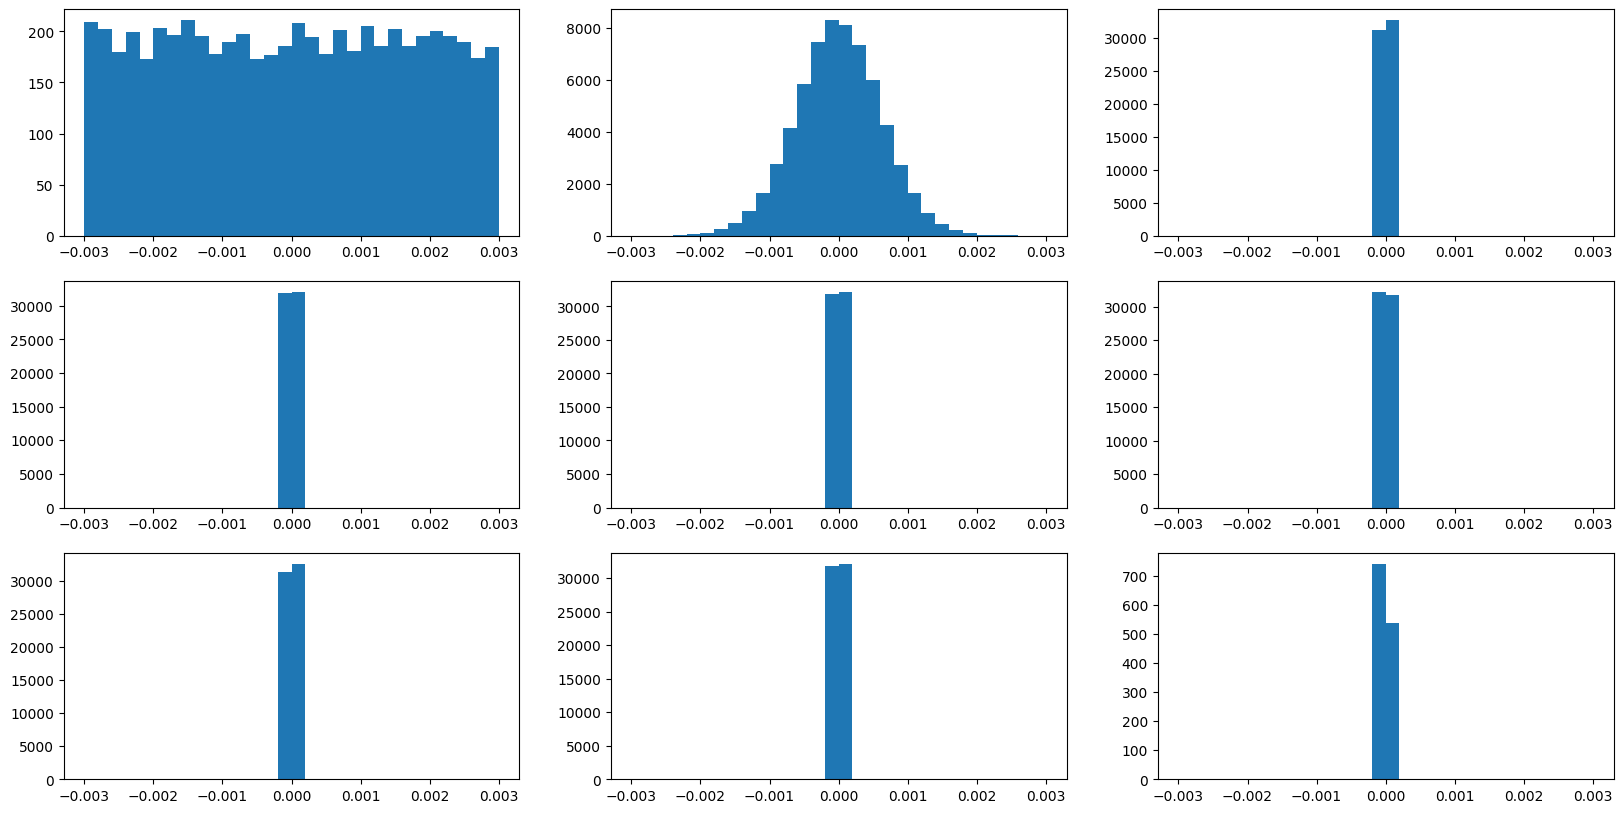

In [20]:
plt.figure(figsize=(20,10))

for i, (k, v) in enumerate(acts.items()):
    print(f'La activación para la capa {k} \
tiene una media de {v.ravel().mean():.4} y una std de {v.ravel().std():.4}')

for i, (k, v) in enumerate(acts.items(), 1):
    plt.subplot(3, 3, i)
    plt.hist(v.ravel(), bins=30, range=[-.003, .003])

plt.show()
    

### Pruebas con Xavier init

In [28]:
acts_x = {}
z= x_t.T
for (k, v) in weights_x.items():
    z = v @ z
    #z = np.maximum(0, z)
    #z = np.tanh(z)
    z = 1/(1+np.exp(-z))
    acts_x[k] = z


La activación para la capa L1 tiene una media de 0.4891 y una std de 0.2069
La activación para la capa L2 tiene una media de 0.5005 y una std de 0.1189
La activación para la capa L3 tiene una media de 0.4964 y una std de 0.1194
La activación para la capa L4 tiene una media de 0.489 y una std de 0.1208
La activación para la capa L5 tiene una media de 0.5003 y una std de 0.1134
La activación para la capa L6 tiene una media de 0.4937 y una std de 0.1237
La activación para la capa L7 tiene una media de 0.4968 y una std de 0.1148
La activación para la capa L8 tiene una media de 0.5016 y una std de 0.121
La activación para la capa L9 tiene una media de 0.4718 y una std de 0.1221


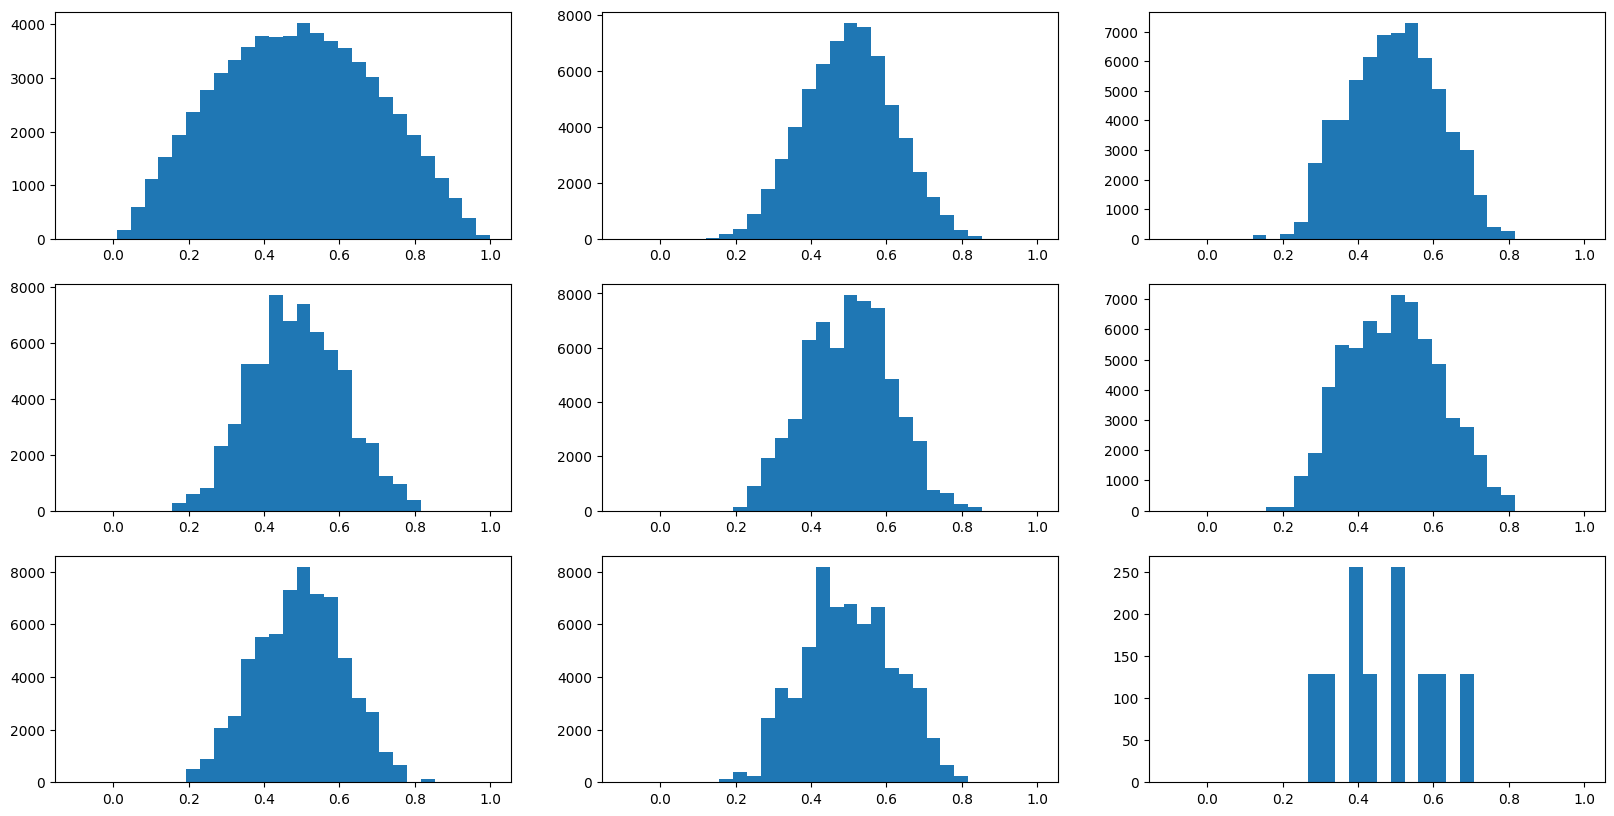

In [30]:
plt.figure(figsize=(20,10))

for (k, v) in acts_x.items():
    print(f'La activación para la capa {k} \
tiene una media de {v.ravel().mean():.4} y una std de {v.ravel().std():.4}')

for i, (k, v) in enumerate(acts_x.items(), 1):
    plt.subplot(3, 3, i)
    plt.hist(v.ravel(), bins=30, range=[-.1, 1])
    
plt.show()

### Pruebas con Kaiming He init

In [23]:
acts_k = {}
z= x_t.T
for (k, v) in weights_k.items():
    z = v @ z
    z = np.maximum(0, z) 
    acts_k[k] = z


La activación para la capa L1 tiene una media de 0.5749 y una std de 0.8487
La activación para la capa L2 tiene una media de 0.6118 y una std de 0.8933
La activación para la capa L3 tiene una media de 0.5521 y una std de 0.8501
La activación para la capa L4 tiene una media de 0.5668 y una std de 0.8859
La activación para la capa L5 tiene una media de 0.6022 y una std de 0.9449
La activación para la capa L6 tiene una media de 0.5846 y una std de 0.9003
La activación para la capa L7 tiene una media de 0.5208 y una std de 0.8773
La activación para la capa L8 tiene una media de 0.5937 y una std de 0.8902
La activación para la capa L9 tiene una media de 0.9982 y una std de 0.9553


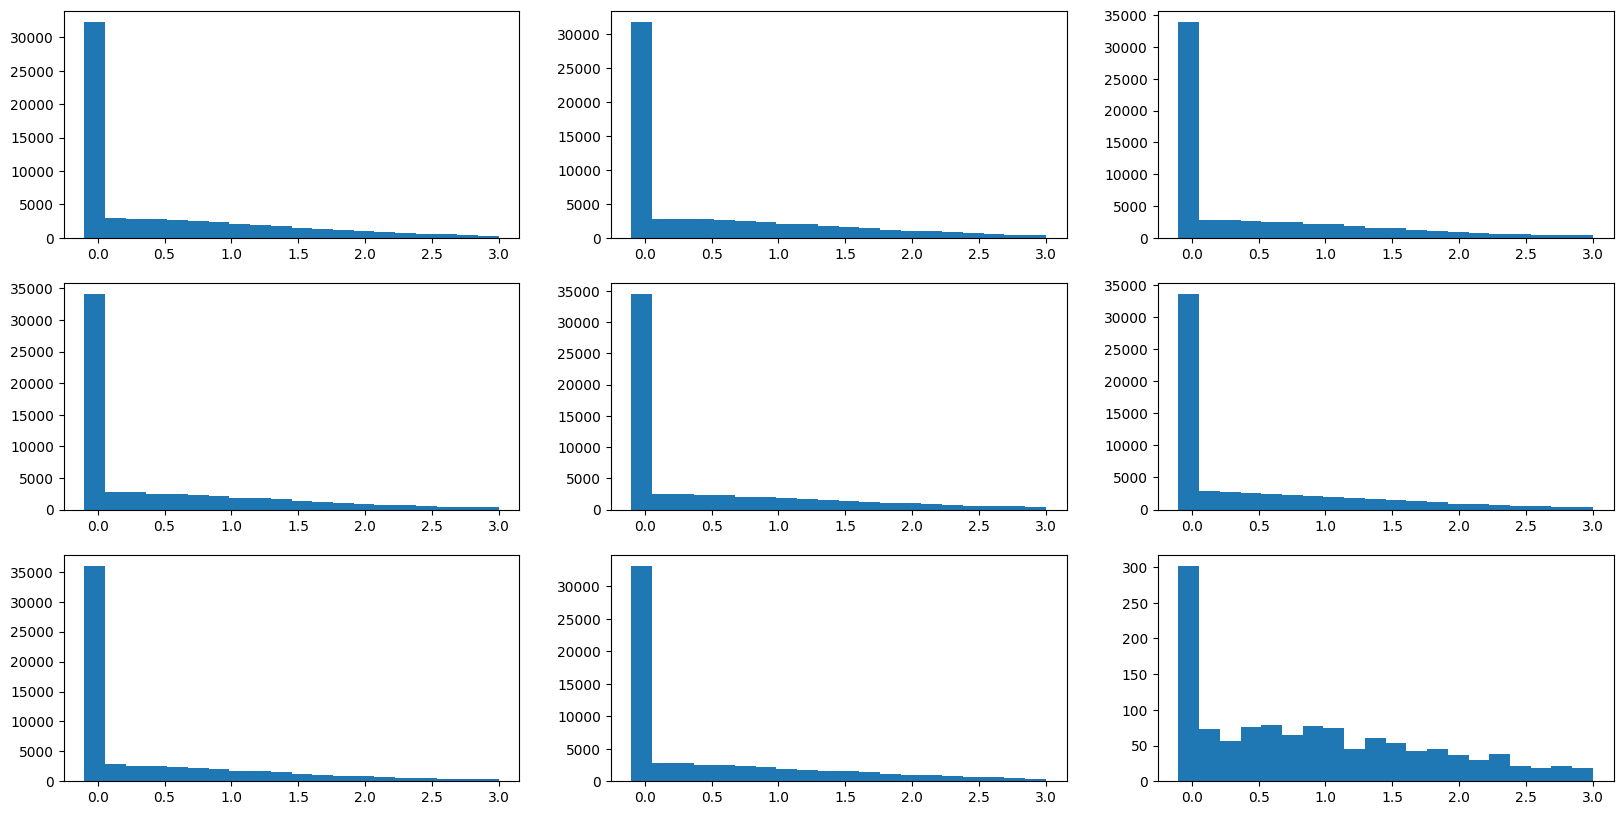

In [31]:
plt.figure(figsize=(20,10))
for (k, v) in acts_k.items():
    print(f'La activación para la capa {k} \
tiene una media de {v.ravel().mean():.4} y una std de {v.ravel().std():.4}')

for i, (k, v) in enumerate(acts_k.items(), 1):
    plt.subplot(3, 3, i)
    plt.hist(v.ravel(), bins=20, range=[-.1, 3])

plt.show()